# Stat 535 HW3
Dongyang Wang

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

### Problem 1

#### a

There are 6 quantities I have calculated during HW2 Problem 1. Namely, 
1. Traning Cost for dataset b: $\hat{l_b}$
2. Testing Cost for dataset b: $L_b$
3. Average Training Cost: $\hat{l}$
4. Average Testing Cost: $\hat{L}$
5. Empirical Variance: $V$
6. Bayesian Loss: $L^*$

Out of these, statistical approximations include: Average Training Cost $\hat{l}$ is a statistical approximation because it calculates the mean from samples of Traning Cost $\hat{l_b}$; Average Testing Cost $\hat{L}$ is a statistical approximation because it calculates the mean from samples of Testing Cost $L_b$. Empirical Variance $V$ can also be regarded as a statistical approximation because it takes the mean of the averaged variance in terms of $p_i$.

Also, a numerical approximation is the Bayesian Loss $L^*$. We are trying to calculate the expectation of $1 - max_yP(Y|X)$ which would ideally be integrated but are actually calculated using discretization by obtaining the probability at specific points for the given pdf.

#### b
If we can change the data generation function, we may choose distributions with bigger gaps in means and smaller variance for the +1 and -1 cases, this would improve the approximation accuracy for the traning costs, reduce the empirical variance, as well as make the Bayes loss better.

Otherwise, we can also add in more data points. This would help us get a better decision boundary and improve the approximation accuracy for the errors and the variance. This will not affect the Bayes Loss much.

Moreover, we can find the best K. To reduce the training error, we can simply set K =1. But for test error, we can use cross validation for reducing the error. The empirical variance will be reduced accordingly. The Bayes Loss will not be affected though.

#### c
The Bayesian Loss $L^*$ is exact because it is calculated with the use of normal distribution pdf.


#### d
No. Even if we increase n to approximately infinity, the Bayes error is not converging to 0 because the density at given points of x will not change because the pdf does not change and therefore will not always provide the correct classification.

#### e
Yes. With infinite number of observations, the training models would be the same model and therefore the predictions on the test will be identical and the error bars will approach 0.

#### f
Yes. With infinite number of observations, the training models would be the same model and therefore there will be no variation in the training error and the error bars will approach 0.

#### g
With a LDA, for example, The Bayes error will not approach 0 as explained above: because the density at given points of x will not change because the pdf does not change and therefore will not always provide the correct classification. The error bars on L will approach 0 because the training models would be the same model and therefore the predictions on the test will be identical. For error bars on l hat, the training models would be the same model and therefore there will be no variation in the training error and the error bars will approach 0.

#### h
No. The test error does not imply anything about the Bayes Loss, with the latter calculated based on the true distribution of the data generating function.

#### i
It does not imply zero testing error because the training models are potentially overfitted (e.g., K=1 in KNN); and the variance of model is not necessarily zero because the model can be too sensitive to small changes in the training set and will display huge variance as new data is introduced.

### Problem 2

#### a

$MISE = C_1 h^4 + C_2 \frac{1}{n h^d} = C_1 {C_3}^4 n^{-\frac{4}{d+4}} + C_2\frac{1}{{C_3}^d n^{1-\frac{d}{d+4}}} = C_1 {C_3}^4 n^{-\frac{4}{d+4}} + \frac{C_2}{{C_3}^d}  n^{-\frac{4}{d+4}} \propto n^{-\frac{4}{d+4}}$

Therefore, $\alpha = -\frac{4}{d+4}$ and $\alpha = -\frac{4}{5}$ when $d=1$

#### b

$MISE = C_1 h^4 + C_2 \frac{1}{n h^d} = C_1 {C_3}^4 n^{-\frac{4}{d+5}} + C_2\frac{1}{{C_3}^d n^{1-\frac{d}{d+5}}} = C_1 {C_3}^4 n^{-\frac{4}{d+5}} + \frac{C_2}{{C_3}^d}  n^{-\frac{5}{d+5}} \propto n^{-\frac{4}{d+5}}$

Therefore, $\alpha' = -\frac{4}{d+5}$ and $\alpha' = -\frac{4}{6} = -\frac{2}{3}$ when $d=1$

By comparison, $\alpha < \alpha'$ so with $\alpha'$ we converge faster and the choice of $h = C_3 n^{-\frac{1}{d+5}}$

### Problem 4

#### a

$z_1 = \phi((1 + x_1 - x_2)*20) = \frac{1}{1 + \exp(-20 - 20x_1 + 20x_2)}$

$z_2 = \phi((x_1 + x_2)*20) = \frac{1}{1 + \exp(- 20 x_1 - 20 x_2)}$

$z_3 = \phi((2 - x_2)*20) = \frac{1}{1 + \exp(-40 + 20x_2)}$

$z_4 = \phi((2 - x_1)*20) = \frac{1}{1 + \exp(-40 + 20 x_1)}$

$z_5 = \phi((2 -0.5 x_1 + x_2)*20) = \frac{1}{1 + \exp(-40 + 10 x_1 - 20 x_2)}$

$f(x) = -4.9 + \frac{1}{1 + \exp(-20 - 20x_1 + 20x_2)} + \frac{1}{1 + \exp(- 20 x_1 - 20 x_2)} + \frac{1}{1 + \exp(-40 + 20x_2)} + \frac{1}{1 + \exp(-40 + 20 x_1)} + \frac{1}{1 + \exp(-40 + 10 x_1 - 20 x_2)}$

In [48]:
def f_x(x1, x2):
    part1 = 1/(1+np.exp(-20-20*x1+20*x2))
    part2 = 1/(1+np.exp(-20*x1 - 20*x2))
    part3 = 1/(1+np.exp(-40+20*x2))
    part4 = 1/(1+np.exp(-40+20*x1))
    part5 = 1/(1+np.exp(-40+10*x1-20*x2))
    return -4.9 + part1 + part2 + part3 + part4 + part5

In [49]:
x = np.linspace(-10, 10, num = 100)
y = np.linspace(-10, 10, num = 100)

X, Y = np.meshgrid(x, y)
Z = f_x(X, Y)

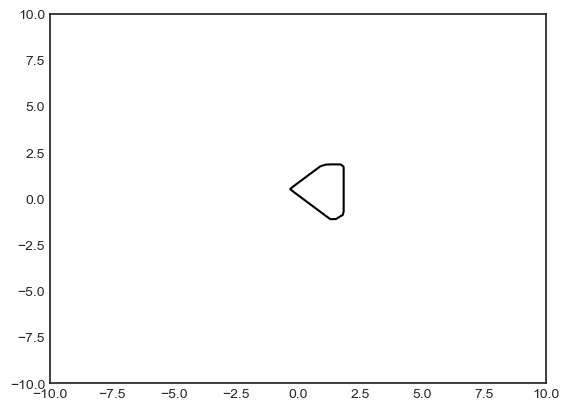

In [50]:
plt.contour(X, Y, Z, levels=[0], colors='black')

#### b

$f(x) = -3.9 + \frac{1}{1 + \exp(-20 - 20x_1 + 20x_2)} + \frac{1}{1 + \exp(- 20 x_1 - 20 x_2)} + \frac{1}{1 + \exp(-40 + 20x_2)} + \frac{1}{1 + \exp(-40 + 20 x_1)} + \frac{1}{1 + \exp(-40 + 10 x_1 - 20 x_2)}$

In [45]:
def f_x(x1, x2):
    part1 = 1/(1+np.exp(-20-20*x1+20*x2))
    part2 = 1/(1+np.exp(-20*x1 - 20*x2))
    part3 = 1/(1+np.exp(-40+20*x2))
    part4 = 1/(1+np.exp(-40+20*x1))
    part5 = 1/(1+np.exp(-40+10*x1-20*x2))
    return -3.9 + part1 + part2 + part3 + part4 + part5

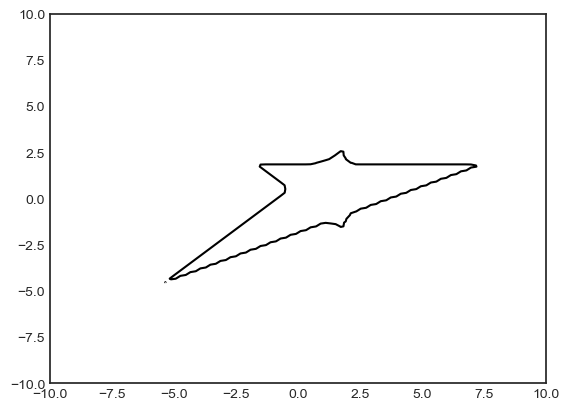

In [47]:
x = np.linspace(-10, 10, num = 100)
y = np.linspace(-10, 10, num = 100)

X, Y = np.meshgrid(x, y)
Z = f_x(X, Y)
plt.contour(X, Y, Z, levels=[0], colors='black')